# Preparing Sangria submission files

In [1]:
import yaml
import numpy
import csv
import pandas

In [2]:
entry = {'author': 'Stas Babak',
         'e-mail': 'stas@apc.in2p3.fr',
         'date': '03/10/20222',           
         'challenge': 'LDC2a',
         'sources': 'MBHBs'}

### Point estimates for MBHBs

In [3]:
mbhb0 = {'Approximant': 'IMRPhenomD',
        'Mass1': 1869759.731,
        'Mass2': 565846.141,
        'ProjectedSpin1': 0.77,
        'ProjectedSpin2': 0.95,
        'CoalescenceTime': 6951400.0,
        'Distance': 4200.9803,
        'Inclination': [1.21, 0.2, 0.3],
        'EclipticLatitude': 0.896,
        'EclipticLongitude': 4.5844,
        'Polarization': 1.155,
        'PhaseAtCoalescence': 1.285
       }

mbhb1 = {'Approximant': 'IMRPhenomD',
        'Mass1': 2869759.731,
        'Mass2': 1565846.141,
        'ProjectedSpin1': 0.86,
        'ProjectedSpin2': 0.59,
        'CoalescenceTime': 7951400.0,
        'Distance': 40354.94,
        'Inclination': 1.43,
        'EclipticLatitude': 0.02,
        'EclipticLongitude': 5.32,
        'Polarization': 2.09,
        'PhaseAtCoalescence': 2.32
}

submit = {'Mass1': 'solar_mass',
        'Mass2': 'solar_mass',
        'ProjectedSpin1': 'none',
        'ProjectedSpin2': 'none',
        'CoalescenceTime': 'sec',
        'Distance': 'Mpc',
        'Inclination': 'rad'
        'EclipticLatitude': 'rad',
        'EclipticLongitude': 'rad',
        'Polarization': 'rad',
        'PhaseAtCoalescence': 'rad'}

entry['srcMBHB0'] = [mbhb0]
entry['srcMBHB1'] = [mbhb1]
entry['units'] = [units]



SyntaxError: invalid syntax (1779654272.py, line 36)

In [ ]:
open('Babak-ldc2a-mbhb.yaml','w').write(yaml.dump(entry, default_flow_style=False))

In [ ]:
!cat Babak-ldc2a-mbhb.yaml

### Submission with ranges

In [4]:
print ('format: value +range -range')
rMBHB0 = {
        'Approximant': 'IMRPhenomD',
        'Mass1': [1869759.73, 1234.1, 5678.2],
        'Mass2': [565846.141, 1234.5, 6789.1],
        'ProjectedSpin1': [0.77, 0.2, 0.3],
        'ProjectedSpin2': [0.95, 0.05, 0.7],
        'CoalescenceTime': [6951400.0, 110.0, 230.0],
        'Distance': [4200.9803, 1000.0, 2000.0],
        'Inclination': [1.21, 0.2, 0.3],
        'EclipticLatitude': [0.896, 0.11, 0.15],
        'EclipticLongitude': [4.5844, 0.22, 0.21],
        'Polarization': [1.155, 0.45, 0.65],
        'PhaseAtCoalescence': [1.285, 0.33, 0.76]
}
MBHB0_wr= {}
for key, val in rMBHB0.items():
    if (isinstance(val, list)):
        # print (val)
        MBHB0_wr[key] = '{} + {} - {}'.format(val[0], val[1], val[2])
    else:
        MBHB0_wr[key] = val


format: value +range -range


In [5]:
entry['srcMBHB0'] = [MBHB0_wr]
entry['notes'] = '68% symmetric credible interval'
open('Babak-ldc2a-mbhb_range.yaml','w').write(yaml.dump(entry, default_flow_style=False))

594

In [6]:
!cat Babak-ldc2a-mbhb_range.yaml

author: Stas Babak
challenge: LDC2a
date: 03/10/20222
e-mail: stas@apc.in2p3.fr
notes: 68% symmetric credible interval
sources: MBHBs
srcMBHB0:
- Approximant: IMRPhenomD
  CoalescenceTime: 6951400.0 + 110.0 - 230.0
  Distance: 4200.9803 + 1000.0 - 2000.0
  EclipticLatitude: 0.896 + 0.11 - 0.15
  EclipticLongitude: 4.5844 + 0.22 - 0.21
  Inclination: 1.21 + 0.2 - 0.3
  Mass1: 1869759.73 + 1234.1 - 5678.2
  Mass2: 565846.141 + 1234.5 - 6789.1
  PhaseAtCoalescence: 1.285 + 0.33 - 0.76
  Polarization: 1.155 + 0.45 - 0.65
  ProjectedSpin1: 0.77 + 0.2 - 0.3
  ProjectedSpin2: 0.95 + 0.05 - 0.7


## Submitting posteriror samples

Building a fake chains

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use(['seaborn-ticks','seaborn-deep'])
# %pylab inline

mpl.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (12,7)
import corner




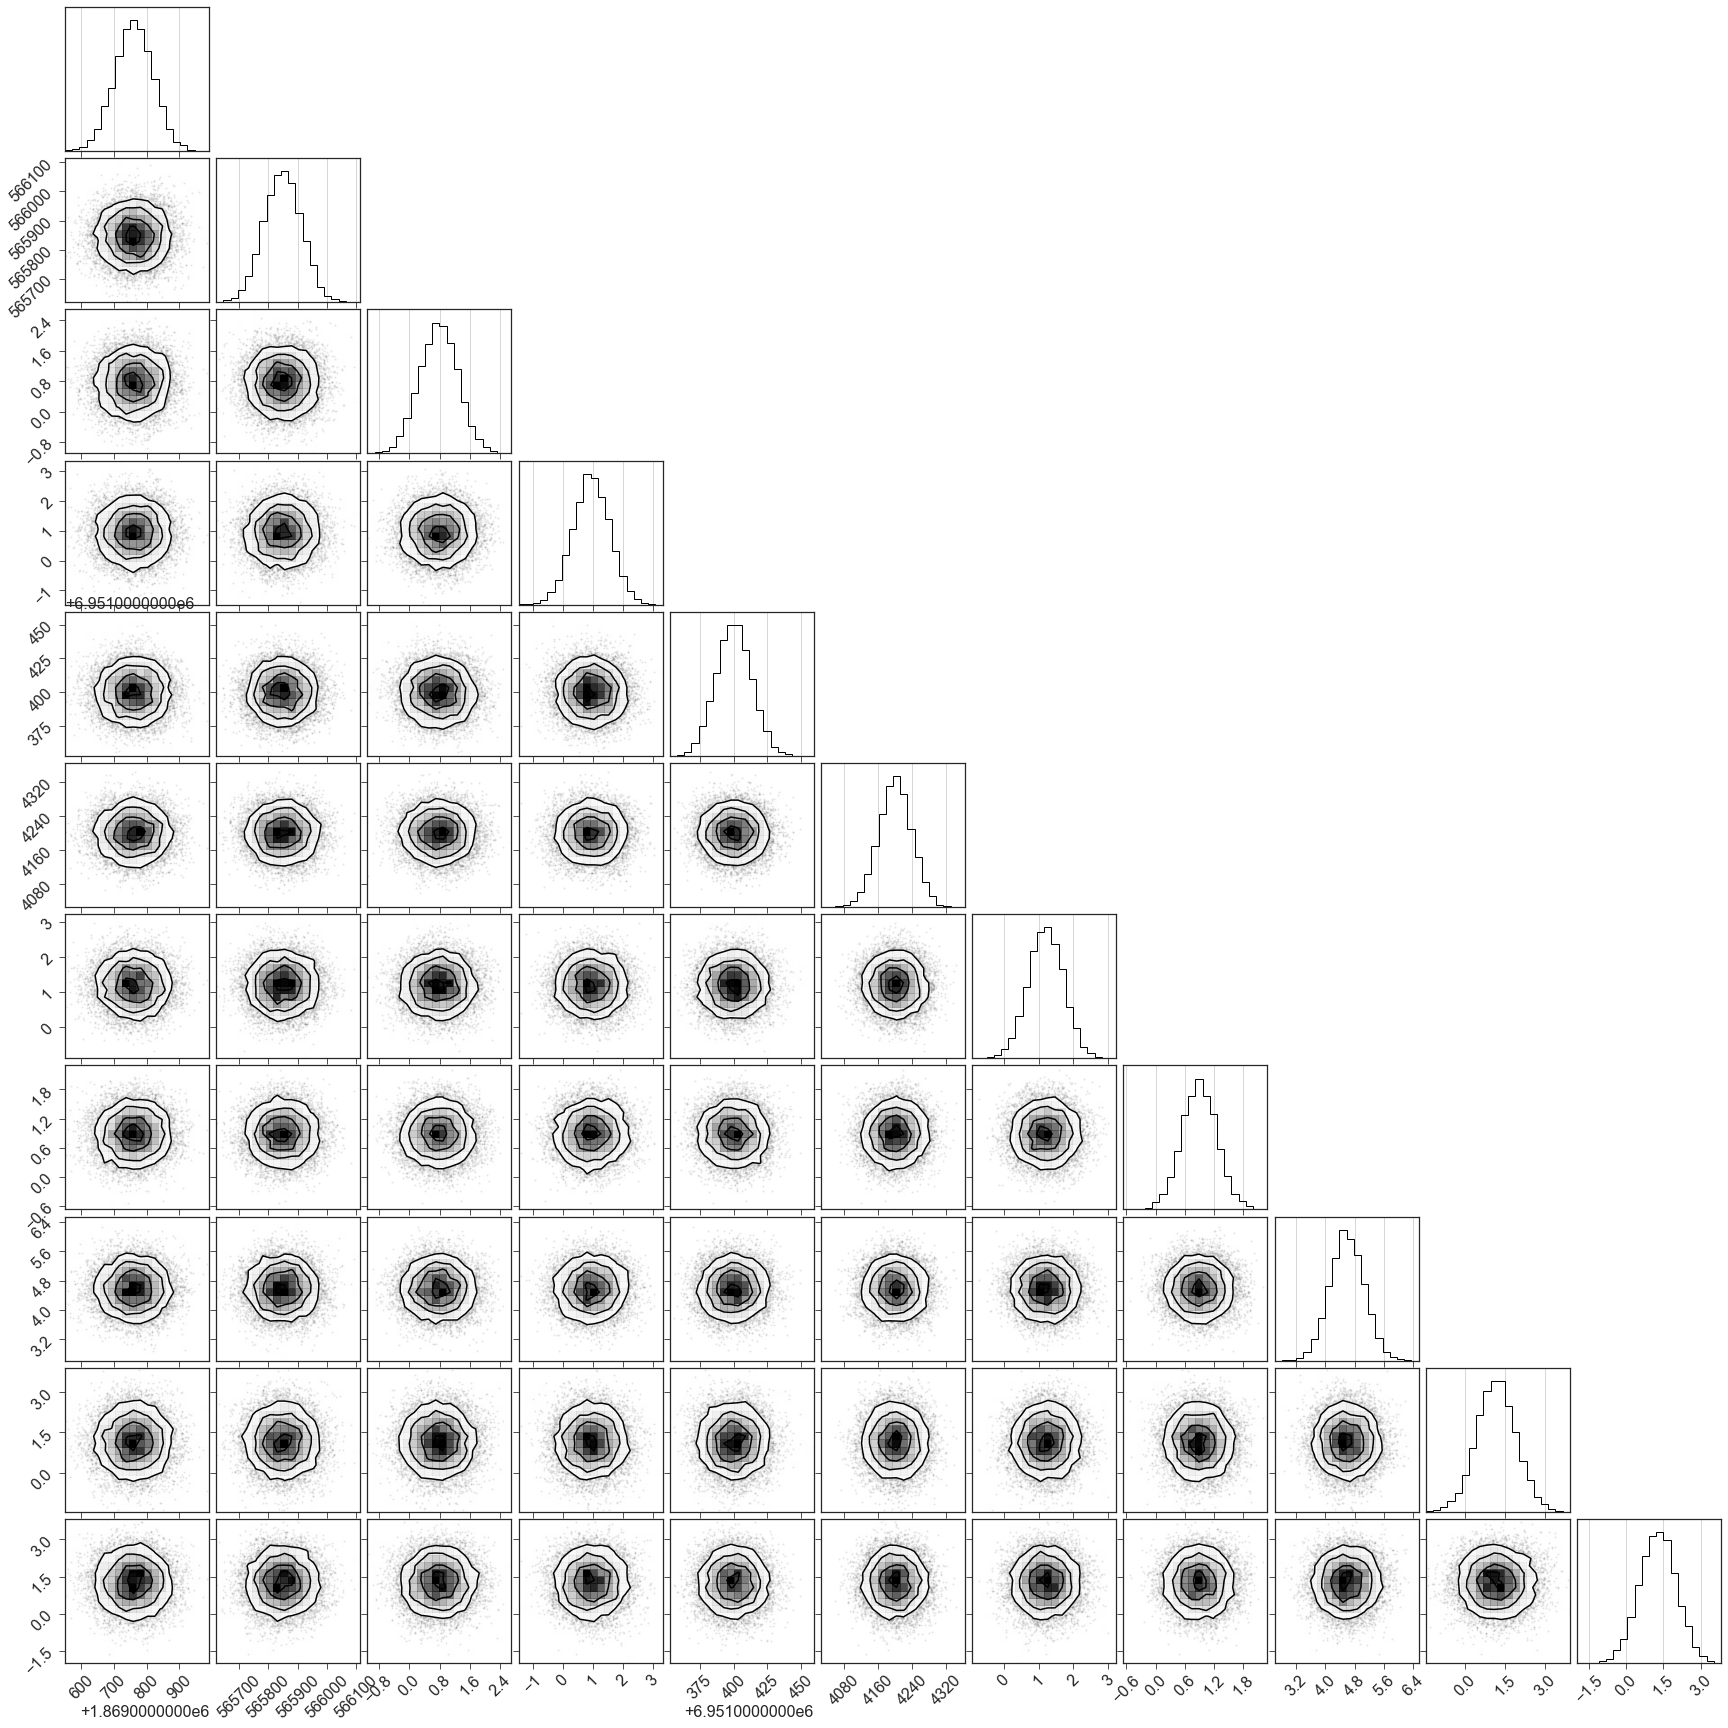

In [8]:
Nchn = 10000
pseudo_chain_MBH0 = np.zeros((Nchn, 11))
mean = np.zeros(11)
cov = np.zeros((11,11))

cnt = 0
for ii, key in enumerate(rMBHB0.keys()):
    val = rMBHB0[key]
    if (isinstance(val, list)):
        mean[cnt] = val[0]
        cov[cnt ,cnt] = 0.5*(val[1] + val[2])
        cnt += 1

chn = np.random.multivariate_normal(mean, cov, size=Nchn)

fig = corner.corner(chn)
plt.show()


In [9]:
print ("!!! You must take care of the precision of data yourself (for saving to the file) !!!")
Param_names = ['Mass1_0', 'Mass2_0', 'Spin1_0', 'Spin2_0', 'Tc_0', 'DL_0', 'Incl_0', 'EclLat_0', 'EclLong_0', 'Pol_0', 'PhC_0' ]
# print (len(Param_names))
np.savetxt('mbhb-0-pdf.csv', chn,
              header=','.join(Param_names),
              delimiter=',', fmt='%.8e')

!!! You must take care of the precision of data yourself (for saving to the file) !!!


You can also use pandas' table to write directly to csv (see Galaxy submission notebook for example)

### Saving posteriror of correlated sources

In case you have two or more correlated sources you can save their posterirors in a single file. 

You need to index each your MBHB (should do it anyway) and attach in indext to the corresponding parameter. 
For example, the header for two MBHBs will look like this (see also Galaxy submission notebook))

In [10]:
base_names = ['Mass1', 'Mass2', 'Spin1', 'Spin2', 'Tc', 'DL', 'Incl', 'EclLat', 'EclLong', 'Pol', 'PhC' ]

N_mbhb = 2
params_2mbhb_names = []
for ii in range(N_mbhb):
    for nm in base_names:
        params_2mbhb_names.append(nm+"_"+str(ii))

print(params_2mbhb_names)
        

['Mass1_0', 'Mass2_0', 'Spin1_0', 'Spin2_0', 'Tc_0', 'DL_0', 'Incl_0', 'EclLat_0', 'EclLong_0', 'Pol_0', 'PhC_0', 'Mass1_1', 'Mass2_1', 'Spin1_1', 'Spin2_1', 'Tc_1', 'DL_1', 'Incl_1', 'EclLat_1', 'EclLong_1', 'Pol_1', 'PhC_1']


The rest is similar to the single source submission file. 
